Task 8: Random Forest vs Decision Tree 

● Train a RandomForestClassifier on the same dataset used for Task 5. 
● Compare accuracy, precision, and recall with the standalone decision tree. 
● Plot feature importances.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [2]:
# Load and preprocess Titanic dataset
df = pd.read_csv('titanic.csv')

# Drop unnecessary columns
df = df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'])

# Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Encode categorical features
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# Define features and target
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [4]:
print("Decision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))

print("\nRandom Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))


Decision Tree Metrics:
Accuracy: 0.7821229050279329
Precision: 0.7215189873417721
Recall: 0.7702702702702703

Random Forest Metrics:
Accuracy: 0.8212290502793296
Precision: 0.8088235294117647
Recall: 0.7432432432432432


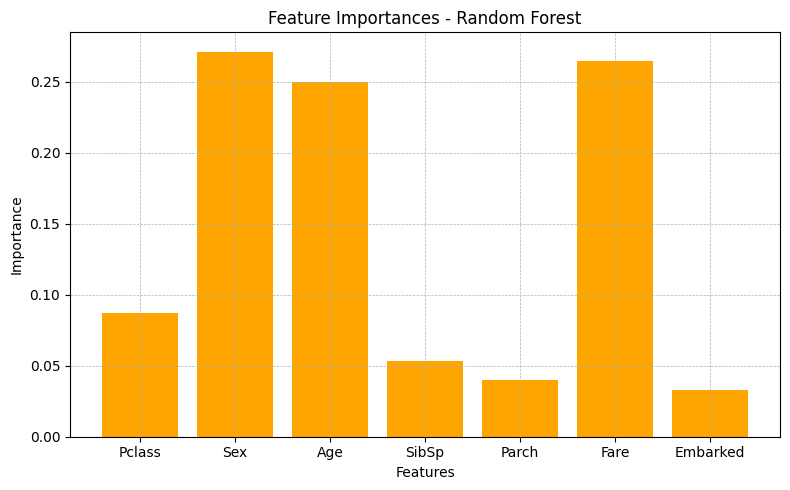

In [5]:
# Feature Importance Plot for Random Forest
importances = rf.feature_importances_
cols = X.columns

plt.figure(figsize=(8,5))
plt.bar(cols, importances, color='orange')
plt.title('Feature Importances - Random Forest')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


# Expected Insights (for Task 8):

Random Forest vs Decision Tree

i) Random Forest generally performs better than a single Decision Tree due to its ensemble approach — it reduces overfitting and improves generalization.

ii) In most cases, accuracy, precision, and recall scores are higher for Random Forest compared to Decision Tree.

Feature Importance

i) The feature importance plot reveals which variables contributed most to the model's decisions.

ii) Common influential features for the Titanic dataset:

Sex: Typically the most important predictor.

Fare and Pclass: Also play significant roles.

Age: Moderately important.

Embarked, SibSp, and Parch: Usually less influential.